In [139]:
# importing the require pandas library

In [140]:
import pandas as pd

In [141]:
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Removing all unnecessary columns that do not impact the prediction in the Titanic survival prediction model.

In [142]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [143]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [144]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [145]:
inputs = df.drop('Survived' , axis = 'columns')
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [146]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Handling missing data in Age

In [147]:
age_median = inputs['Age'].dropna().mean()
age_median

29.69911764705882

In [148]:
inputs['Age'] = inputs['Age'].fillna(age_median)

# handling string in Sex using labelEncoder

In [149]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [150]:
inputs['Sex'] = le_sex.fit_transform(inputs['Sex'])
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


## Checking the NaN values

In [151]:
# prompt: Checking the NaN values

inputs.isnull().sum()


Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train , x_test , y_train , y_test = train_test_split(inputs , target , test_size = 0.2)

In [154]:
print(len(x_train) , len(x_test) , len(y_train) , len(y_test))

712 179 712 179


## Now trainig the model using Decision Tree

In [155]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [156]:
tree_model.fit(x_train , y_train)

DecisionTreeClassifier()

In [157]:
y_pred_tree = tree_model.predict(x_test)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       112
           1       0.73      0.67      0.70        67

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



## Training model using SVC

In [159]:
from sklearn.svm import SVC
svc_model = SVC()

In [160]:
svc_model.fit(x_train , y_train)

SVC()

In [161]:
y_pred_svc = svc_model.predict(x_test)

## checking classification_Report of the model

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       112
           1       0.56      0.22      0.32        67

    accuracy                           0.64       179
   macro avg       0.61      0.56      0.54       179
weighted avg       0.62      0.64      0.59       179



# Predicting a person servining chance

Fare -> 2000 dollar Gender-> male , Age->31 , Pscale->3 ,

In [163]:
svc_model.predict([[3 , 0 , 31 , 2000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  # for stateless transformers.


array([1])

In [164]:
svc_model.predict([[3,0 , 5, 10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  # for stateless transformers.


array([0])

# Confusion Matrix

In [165]:
y_predicted = model.predict(x_test)

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predicted)
cm

array([[98, 14],
       [52, 15]])

<Axes: >

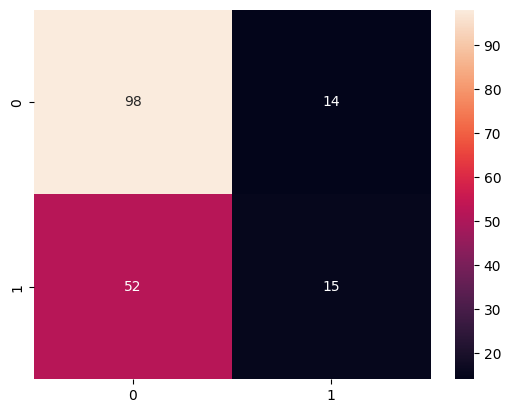

In [167]:
import seaborn as sn
sn.heatmap(cm , annot = True)

In [168]:
# Saving the model

In [169]:
import pickle

with open('svc_model.pkl', 'wb') as file:
  pickle.dump(svc_model, file)


with open('tree_model.pkl', 'wb') as file:
  pickle.dump(tree_model, file)


